In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


In [11]:
df=pd.read_csv('hi.csv')

In [12]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria
...,...,...,...,...,...,...,...
2725,06-03-2021,6,3,2021,3455,17,Sweden
2726,05-03-2021,5,3,2021,4069,12,Sweden
2727,04-03-2021,4,3,2021,4884,14,Sweden
2728,03-03-2021,3,3,2021,4876,19,Sweden


In [13]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria


In [14]:
df.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
2725,06-03-2021,6,3,2021,3455,17,Sweden
2726,05-03-2021,5,3,2021,4069,12,Sweden
2727,04-03-2021,4,3,2021,4884,14,Sweden
2728,03-03-2021,3,3,2021,4876,19,Sweden
2729,02-03-2021,2,3,2021,6191,19,Sweden


In [16]:
df.shape

(2730, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  2730 non-null   object
 1   day                      2730 non-null   int64 
 2   month                    2730 non-null   int64 
 3   year                     2730 non-null   int64 
 4   cases                    2730 non-null   int64 
 5   deaths                   2730 non-null   int64 
 6   countriesAndTerritories  2730 non-null   object
dtypes: int64(5), object(2)
memory usage: 149.4+ KB


In [17]:
df.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
dtype: int64

In [19]:
dup=df.duplicated().any()

In [7]:
df.describe()

,day,month,year,cases,deaths
count,2730.000000,2730.000000,2730.0,2730.000000,2730.000000
mean,16.000000,4.010989,2021.0,3661.010989,65.291941
std,8.765919,0.818813,0.0,6490.510073,113.956634
min,1.000000,3.000000,2021.0,-2001.000000,-3.000000
25%,8.000000,3.000000,2021.0,361.250000,2.000000
50%,16.000000,4.000000,2021.0,926.500000,14.500000
75%,24.000000,5.000000,2021.0,3916.250000,72.000000
max,31.000000,5.000000,2021.0,53843.000000,956.000000


In [8]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories'],
      dtype='object')

In [9]:
country_stats = df.groupby('countriesAndTerritories').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
print("Total cases and deaths per country:\n", country_stats)

Total cases and deaths per country:
    countriesAndTerritories    cases  deaths
0                  Austria   184416    1925
1                  Belgium   288119    2696
2                 Bulgaria   171236    7471
3                  Croatia   113168    2488
4                   Cyprus    37700     129
5                  Czechia   421221    9639
6                  Denmark    69188     155
7                  Estonia    62916     654
8                  Finland    34760     177
9                   France  2020808   22977
10                 Germany  1234058   18337
11                  Greece   210201    5550
12                 Hungary   371613   14675
13                 Iceland      527       1
14                 Ireland    42057     622
15                   Italy  1290738   28347
16                  Latvia    46912     752
17           Liechtenstein      437       4
18               Lithuania    77040    1022
19              Luxembourg    14464     176
20                   Malta     7586    

In [10]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary','Iceland ','Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands','Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
eu_data = df[df['countriesAndTerritories'].isin(eu_countries)]
summary_stats = eu_data.groupby('countriesAndTerritories').agg({'cases': ['mean', 'std'], 'deaths': ['mean', 'std']}).reset_index()
summary_stats.columns = ['Country', 'Mean Cases', 'Std Dev Cases', 'Mean Deaths', 'Std Dev Deaths']
print(summary_stats)


        Country    Mean Cases  Std Dev Cases  Mean Deaths  Std Dev Deaths
0       Austria   2026.549451     995.569254    21.153846        9.946438
1       Belgium   3166.142857    1489.367499    29.626374       10.526842
2      Bulgaria   1881.714286    1492.096052    82.098901       52.742573
3       Croatia   1243.604396     891.781561    27.340659       13.689590
4        Cyprus    414.285714     232.107987     1.417582        1.445806
5       Czechia   4628.802198    4568.044868   105.923077       79.977390
6       Denmark    760.307692     379.739609     1.703297        1.269247
7       Estonia    691.384615     512.714514     7.186813        5.462828
8       Finland    381.978022     229.646442     1.945055        1.753489
9        France  22206.681319   13071.979649   252.494505      122.023347
10      Germany  13561.076923    7094.986871   201.505495       98.548846
11       Greece   2309.901099     848.995944    60.989011       19.821142
12      Hungary   4083.659341    3320.

<Axes: xlabel='cases', ylabel='Count'>

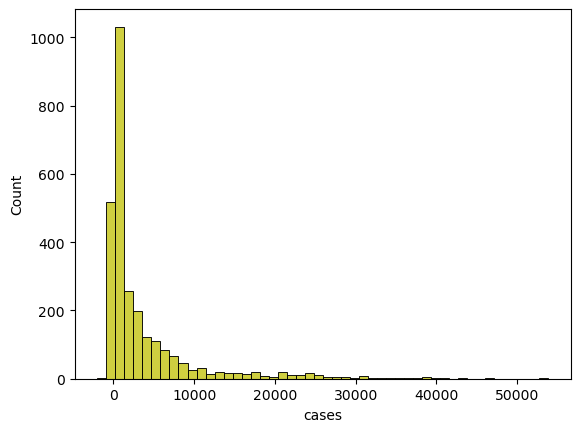

In [11]:
sns.histplot(df, x='cases' ,bins=50, color='y')

<Axes: xlabel='deaths', ylabel='Count'>

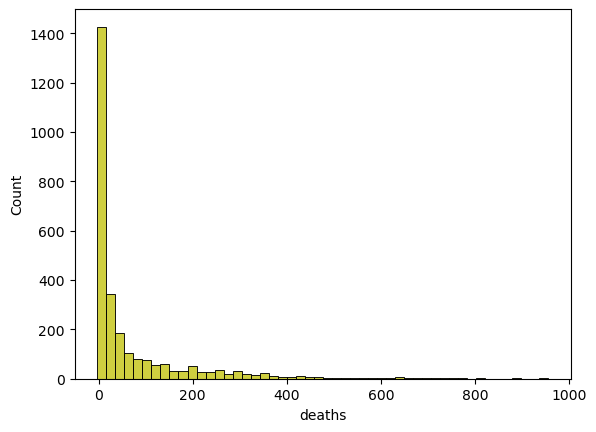

In [28]:
sns.histplot(df, x='deaths' ,bins=50, color='y')

<Axes: xlabel='cases'>

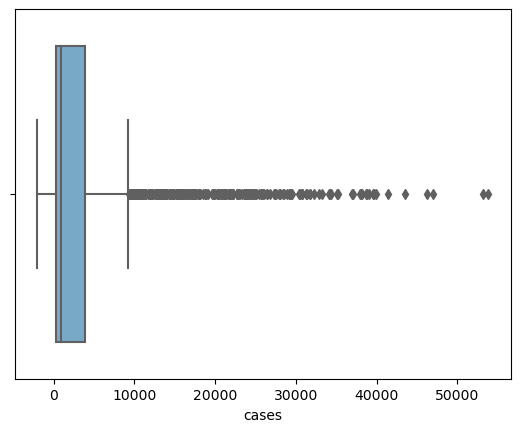

In [12]:
sns.boxplot(df, x='cases', palette='Blues')

In [30]:
month=(df.groupby('month')['cases']).sum()

In [31]:
month

month
3    4223468
4    3938341
5    1832751
Name: cases, dtype: int64

<Axes: xlabel='month'>

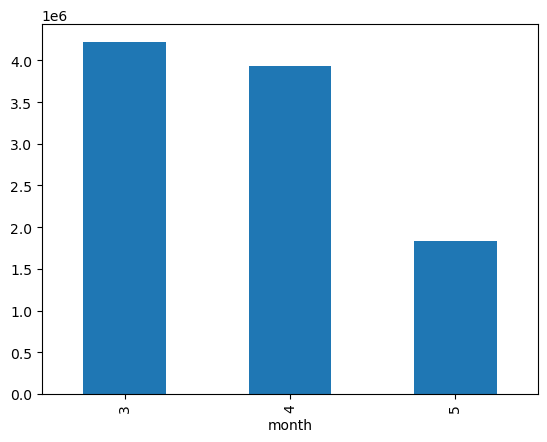

In [32]:
month.plot.bar()

C:\Users\RANJITH B\AppData\Local\Temp\ipykernel_4932\3948157846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

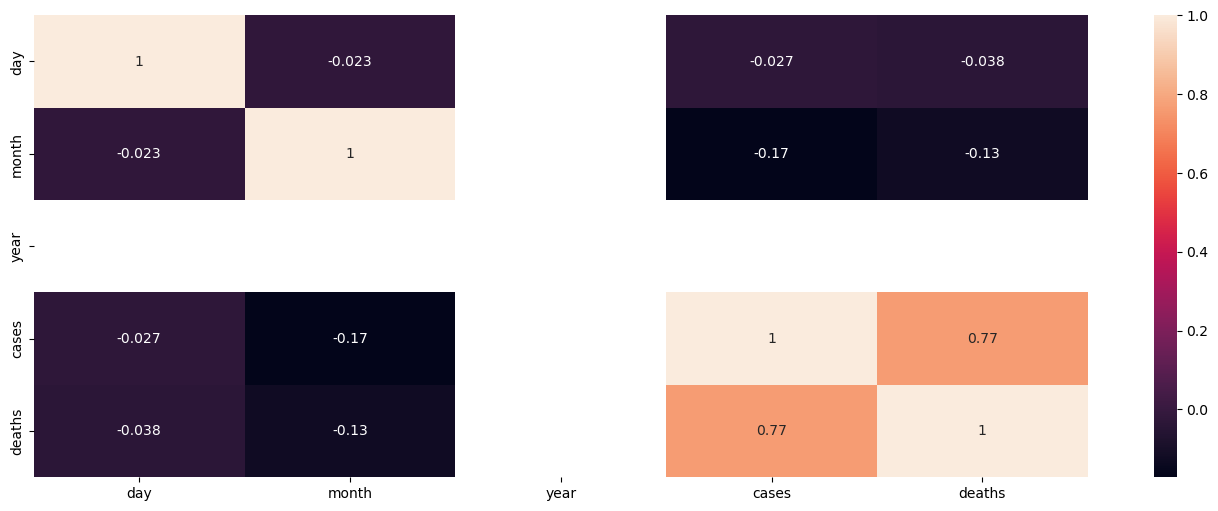

In [37]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

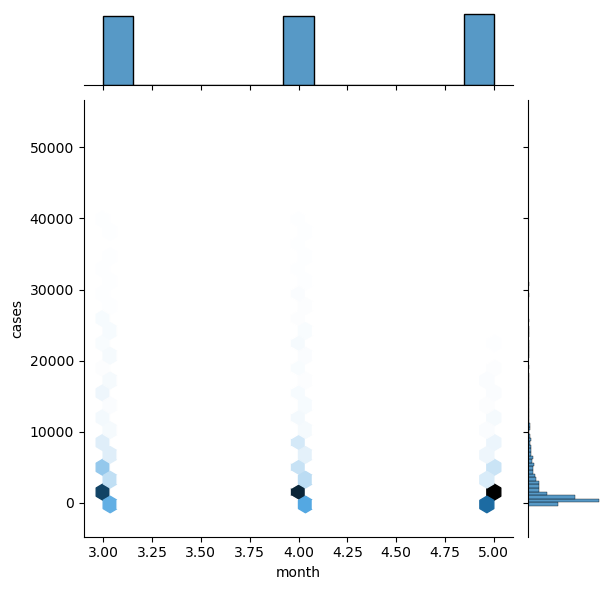

In [38]:
sns.jointplot(df, x='month', y='cases', kind='hex')

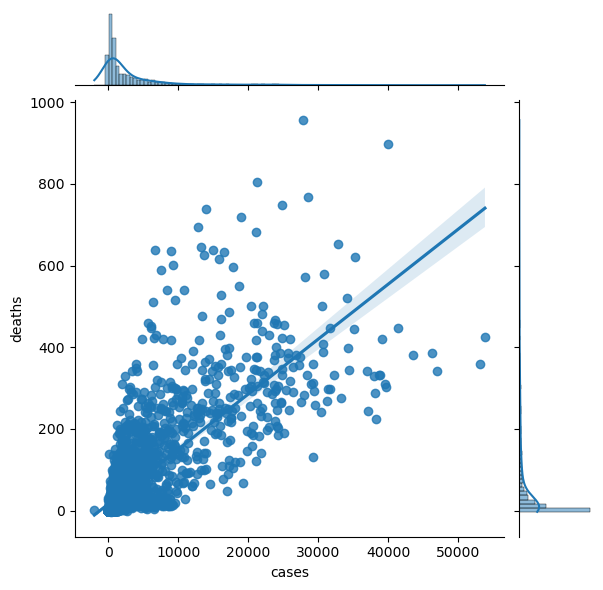

In [14]:
sns.jointplot(df, x='cases', y='deaths', kind='reg')
        

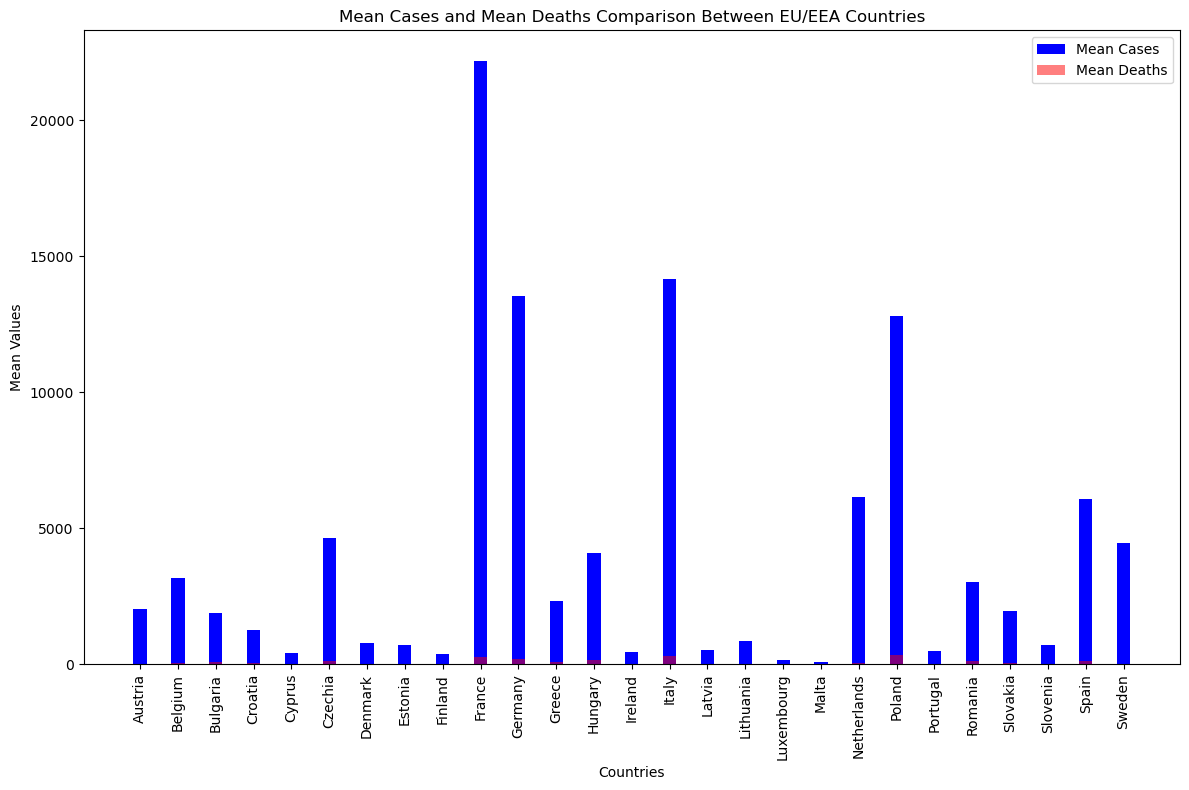

In [15]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

eu_data = df[df['countriesAndTerritories'].isin(eu_countries)]

# Calculate the mean values of cases and deaths for each country
summary_stats = eu_data.groupby('countriesAndTerritories').agg({'cases': 'mean', 'deaths': 'mean'}).reset_index()

# Create a bar chart to compare mean values between each pair of countries
fig, ax = plt.subplots(figsize=(12, 8))
countries = summary_stats['countriesAndTerritories']
mean_cases = summary_stats['cases']
mean_deaths = summary_stats['deaths']

bar_width = 0.35
index = range(len(countries))

plt.bar(index, mean_cases, bar_width, label='Mean Cases', color='blue')
plt.bar(index, mean_deaths, bar_width, label='Mean Deaths', color='red', alpha=0.5)

plt.xlabel('Countries')
plt.ylabel('Mean Values')
plt.title('Mean Cases and Mean Deaths Comparison Between EU/EEA Countries')
plt.xticks(index, countries, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'cases'}>],
       [<Axes: title={'center': 'deaths'}>, <Axes: >]], dtype=object)

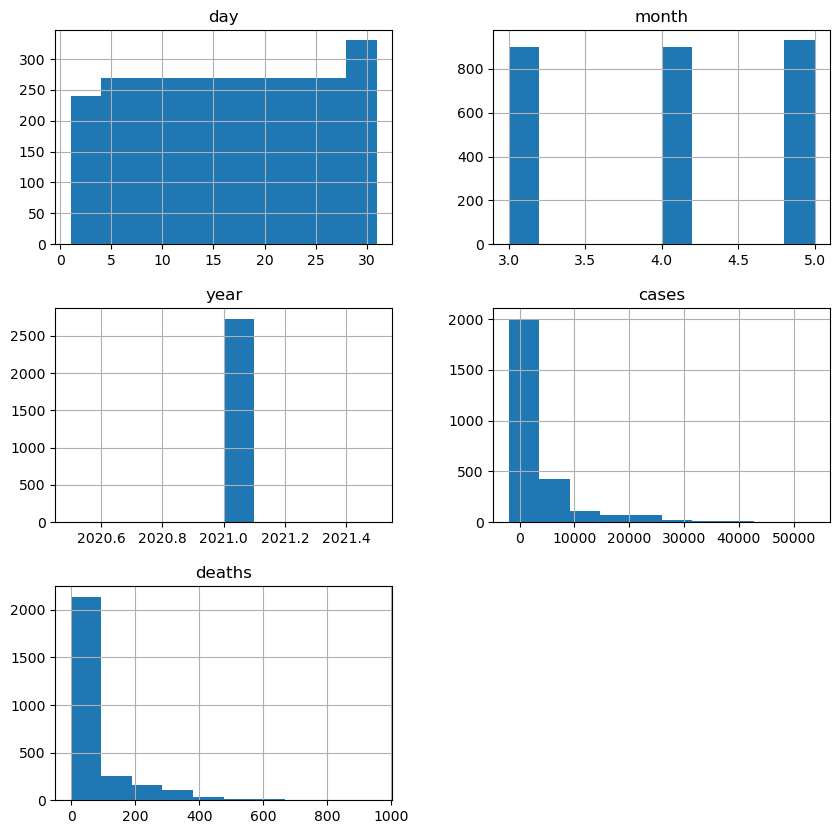

In [35]:
df.hist(figsize=(10,10))

<Figure size 1200x800 with 0 Axes>

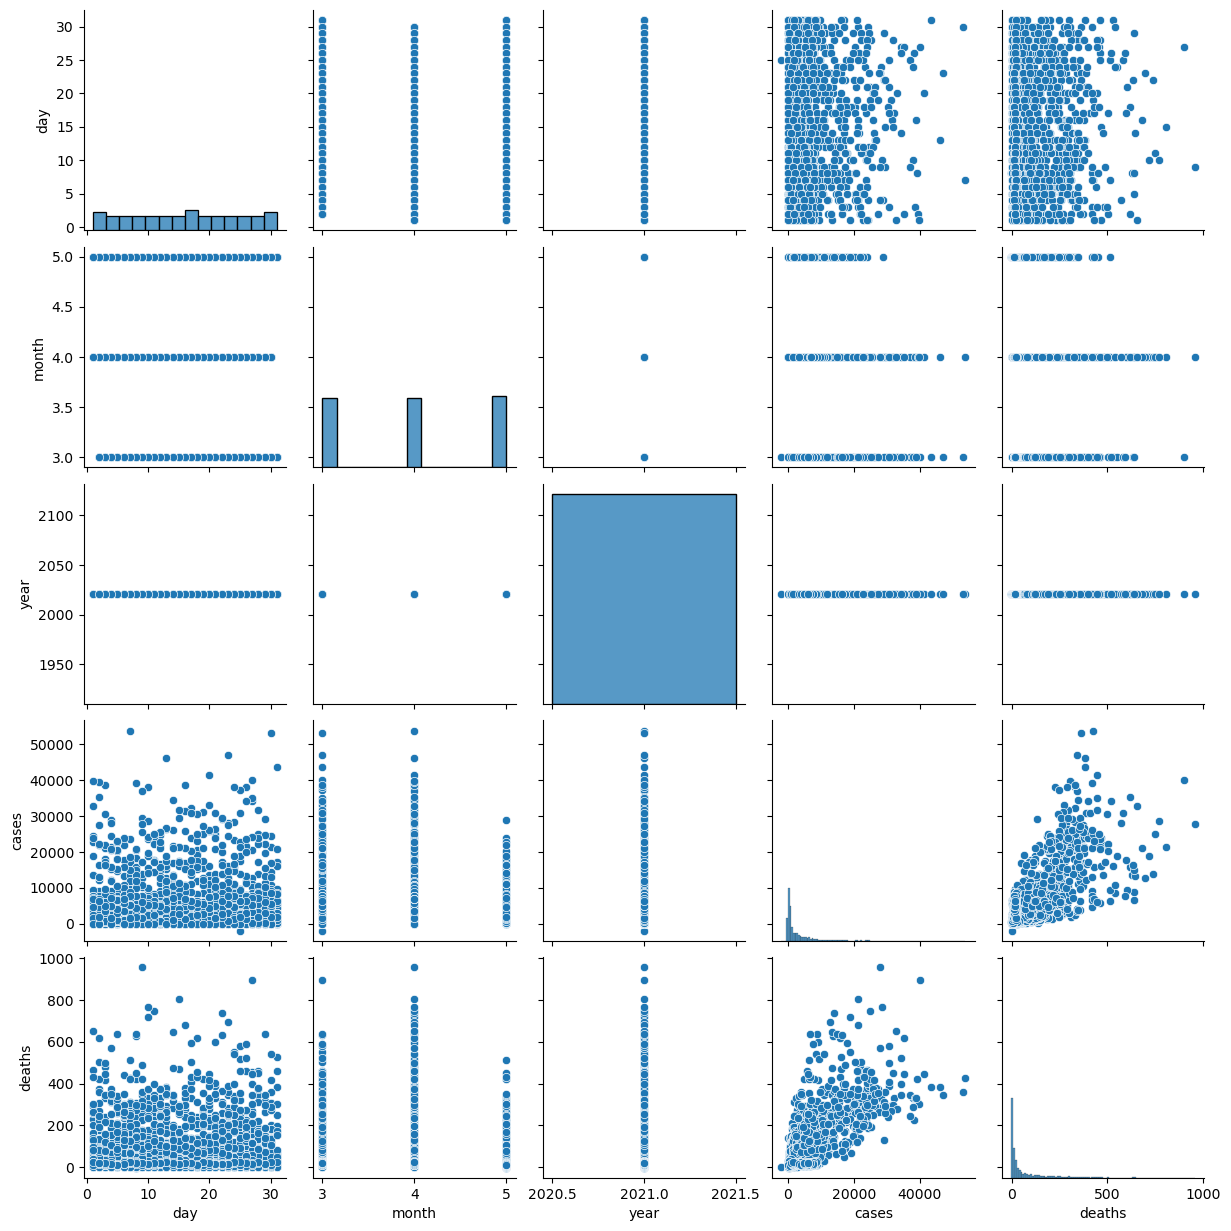

In [16]:
plt.figure(figsize=(12,8))
sns.pairplot(df)